In [1]:
!pip install naima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import astropy.units as u
from astropy.constants import c
import numpy as np
import matplotlib.pyplot as plt

# Particle Populations: Electrons and/or Protons

Distribution functions:
- PowerLaw
- ExponentialCutoffPowerLaw
- LogParabola
- BrokenPowerLaw
- ExponentialCutoffBrokenPowerLaw

In [3]:
from naima.models import PowerLaw, ExponentialCutoffPowerLaw, LogParabola, \
                         BrokenPowerLaw, ExponentialCutoffBrokenPowerLaw

In [4]:
PL = PowerLaw(
    1e36 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    2.1, # alpha
)

In [5]:
ECPL = ExponentialCutoffPowerLaw(
    3e36 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    2.1, # alpha
    13 * u.TeV, # cutoff energy
    1.0 # beta
)

In [6]:
LP = LogParabola(
    6e36 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    2.1, # alpha
    1.0 # beta
)

In [7]:
BPL = BrokenPowerLaw(
    9e36 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    10 * u.TeV, # break energy
    2.1, # alpha 1
    3.7 # alpha 2
)

In [8]:
ECBPL = ExponentialCutoffBrokenPowerLaw(
    2e37 / u.eV, # amplitude
    1 * u.TeV, # reference energy E0
    3 * u.TeV, # break energy
    2.1, # alpha 1
    3.7, # alpha 2
    13 * u.TeV, # cutoff energy
    1.0 # beta
)

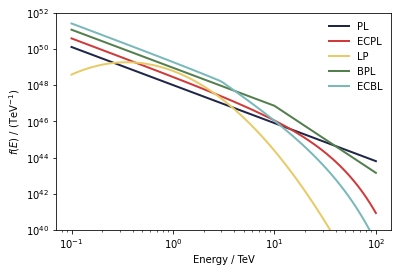

In [9]:
Es = np.logspace(-1,2,100) * u.TeV

plt.plot(Es, PL(Es).to(1/u.TeV), label='PL')
plt.plot(Es, ECPL(Es).to(1/u.TeV), label='ECPL')
plt.plot(Es, LP(Es).to(1/u.TeV), label='LP')
plt.plot(Es, BPL(Es).to(1/u.TeV), label='BPL')
plt.plot(Es, ECBPL(Es).to(1/u.TeV), label='ECBL')

plt.legend()

plt.xlabel(f'Energy / {Es.unit}')
plt.ylabel('$f(E)$ / (TeV$^{-1}$)')

plt.xscale('log')
plt.yscale('log')

plt.ylim(1e40, 1e52);

#plt.savefig('naima_ParticleDistributions.pdf');

# Radiative Models

All radiative models need (proton / electron) particle population (see previous section) as input.

Hadronic: 
- Pion decay

Leptonic:
- IC: Inverse Compton
- Syn: Synchrotron
- Brems: Bremsstrahlung


In [10]:
from naima.models import PionDecay
from naima.models import InverseCompton, Synchrotron, Bremsstrahlung

In [11]:
# Define energy range of photons / gamma rays
Egs = np.logspace(-6, 16, 1000) * u.eV

## Hadronic Interactions

In [12]:
# Define energy range of proton spectrum
Eps = np.logspace(-4, 3, 1000) * u.TeV

# Proton spectrum is ECPL as defined above

### Pion Decay

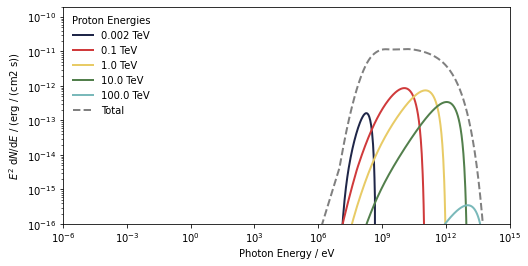

In [13]:
plt.figure(figsize=(8,4))

for i, Ep in enumerate([0.0015, 0.1, 1, 10, 100]*u.TeV):
    PD = PionDecay(ECPL,
                   1 / u.cm**3, # number density of target protons
                   Epmin = 0.9*Ep,
                   Epmax = 1.1*Ep
              )
    plt.plot(Egs, PD.sed(Egs), label=f'{np.round(Ep, 3)}' )

PD = PionDecay(ECPL,
                   1 / u.cm**3, # number density of target protons
                   #Epmin = np.min(Ep),
                   #Epmax = np.max(Ep)
              )
plt.plot(Egs, PD.sed(Egs), label='Total', color='gray', ls='dashed')

plt.legend(title='Proton Energies')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({PD.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-10);

plt.savefig('naima-PionDecay-Edep.pdf');

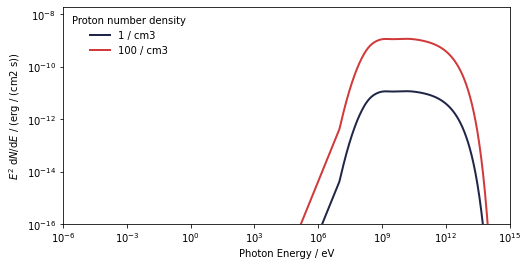

In [14]:
plt.figure(figsize=(8,4))

PD = PionDecay(ECPL,
               1 / u.cm**3, # number density of target protons
              )
plt.plot(Egs, PD.sed(Egs), label='1 / cm3')

PD = PionDecay(ECPL,
               100 / u.cm**3, # number density of target protons
              )
plt.plot(Egs, PD.sed(Egs), label='100 / cm3')

plt.legend(title='Proton number density')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({PD.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-8);

plt.savefig('naima-PionDecay-nH.pdf');

## Leptonic Interactions

In [15]:
# Define energy range of electron spectrum
Ees = np.logspace(-4, 3, 1000) * u.TeV

# Electron spectrum is ECPL as defined above

### Bremsstrahlung

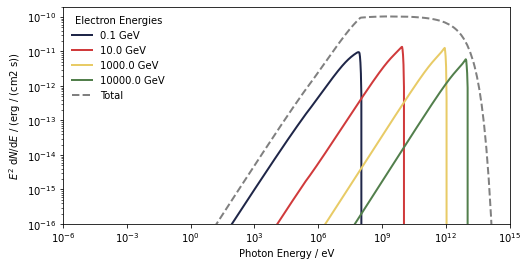

In [16]:
plt.figure(figsize=(8,4))
mask = Egs > 1*u.eV # something wrong in naima?!

for i, Ee in enumerate([0.1, 10, 1000, 10000]*u.GeV):
    Brems = Bremsstrahlung(ECPL,
                       1 / u.cm**3, # total ion number density
                       Eemin=0.9*Ee,
                       Eemax=1.1*Ee
                      )
    plt.plot(Egs[mask], Brems.sed(Egs[mask]), label=f'{np.round(Ee, 2)}' )

Brems = Bremsstrahlung(ECPL,
                       1 / u.cm**3, # total ion number density
                       Eemin=np.min(Ees),
                       Eemax=np.max(Ees)
                      )
plt.plot(Egs[mask], Brems.sed(Egs[mask]), label='Total', color='gray', ls='dashed')

plt.legend(title='Electron Energies')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({Brems.sed(1*u.TeV).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-10);

plt.savefig('naima-Bremsstrahlung-Edep.pdf')

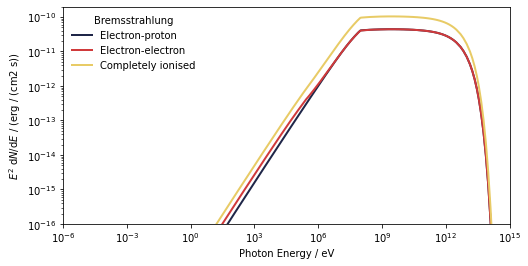

In [17]:
plt.figure(figsize=(8,4))
mask = Egs > 1*u.eV # something wrong in naima?!

Brems = Bremsstrahlung(ECPL,
                       1 / u.cm**3, # total ion number density
                       weight_ee = 0.000001,
                       weight_ep = 1
                      )
plt.plot(Egs[mask], Brems.sed(Egs[mask]), label='Electron-proton')

Brems = Bremsstrahlung(ECPL,
                       1 / u.cm**3, # total ion number density
                       weight_ee = 1,
                       weight_ep = 0.000001,
                      )
plt.plot(Egs[mask], Brems.sed(Egs[mask]), label='Electron-electron')

Brems = Bremsstrahlung(ECPL,
                       1 / u.cm**3, # total ion number density
                      )
plt.plot(Egs[mask], Brems.sed(Egs[mask]), label='Completely ionised')

plt.legend(title='Bremsstrahlung')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({Brems.sed(1*u.TeV).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-10);

plt.savefig('naima-Bremsstrahlung-weights.pdf')

### Inverse Compton

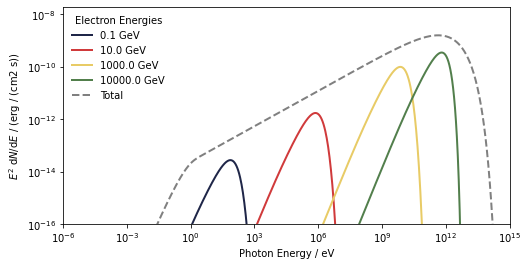

In [18]:
plt.figure(figsize=(8,4))

for i, Ee in enumerate([0.1, 10, 1000, 10000]*u.GeV):
    IC = InverseCompton(ECPL,
                       seed_photon_fields=['CMB'],
                       Eemin=0.9*Ee,
                       Eemax=1.1*Ee
                      )
    plt.plot(Egs, IC.sed(Egs), label=f'{np.round(Ee, 2)}' )

IC = InverseCompton(ECPL,
                    seed_photon_fields=['CMB'],
                    Eemin=0.01*u.GeV
                    )
plt.plot(Egs, IC.sed(Egs), label='Total', color='gray', ls='dashed')

plt.legend(title='Electron Energies')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({Brems.sed(1*u.TeV).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-8);

plt.savefig('naima-InverseCompton-Edep.pdf')

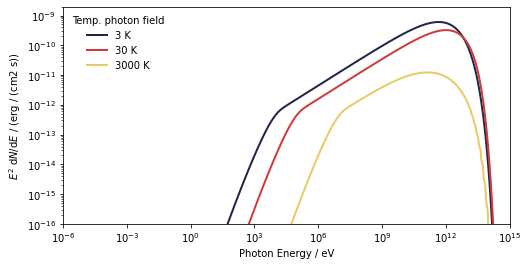

In [19]:
plt.figure(figsize=(8,4))

IC = InverseCompton(ECPL, 
                    index = 1.8,
                    seed_photon_fields=[
                        ['3K', 3*u.K, 0.1*u.eV/u.cm**3],
                        ['30K', 30*u.K, 0.1*u.eV/u.cm**3],
                        ['3000K', 3000*u.K, 0.1*u.eV/u.cm**3],\
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='3K'), label='3 K')
plt.plot(Egs, IC.sed(Egs, seed='30K'), label='30 K')
plt.plot(Egs, IC.sed(Egs, seed='3000K'), label='3000 K')

plt.legend(title='Temp. photon field')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-9);

plt.savefig('naima-InverseCompton-T.pdf')

In [20]:
IC.seed_photon_fields

OrderedDict([('3K',
              {'isotropic': True,
               'type': 'thermal',
               'T': <Quantity 3. K>,
               'u': <Quantity 0.1 eV / cm3>}),
             ('30K',
              {'isotropic': True,
               'type': 'thermal',
               'T': <Quantity 30. K>,
               'u': <Quantity 0.1 eV / cm3>}),
             ('3000K',
              {'isotropic': True,
               'type': 'thermal',
               'T': <Quantity 3000. K>,
               'u': <Quantity 0.1 eV / cm3>})])

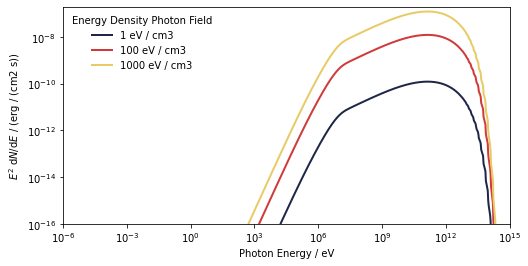

In [21]:
plt.figure(figsize=(8,4))

IC = InverseCompton(ECPL, 
                    index = 1.8,
                    seed_photon_fields=[
                        ['1eVcm3', 3000*u.K, 1*u.eV/u.cm**3],
                        ['100eVcm3', 3000*u.K, 100*u.eV/u.cm**3],
                        ['1000eVcm3', 3000*u.K, 1000*u.eV/u.cm**3],\
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='1eVcm3'), label='1 eV / cm3')
plt.plot(Egs, IC.sed(Egs, seed='100eVcm3'), label='100 eV / cm3')
plt.plot(Egs, IC.sed(Egs, seed='1000eVcm3'), label='1000 eV / cm3')

plt.legend(title='Energy Density Photon Field')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-7);

plt.savefig('naima-InverseCompton-Edens.pdf')

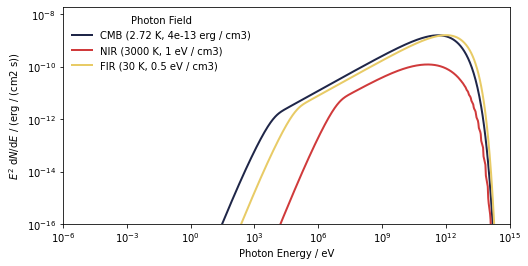

In [22]:
plt.figure(figsize=(8,4))

IC = InverseCompton(ECPL, 
                    index = 1.8,
                    seed_photon_fields=[
                        ['CMB', 2.72548*u.K, 4.17467838e-13*u.erg/u.cm**3],
                        ['NIR', 3000*u.K, 1*u.eV/u.cm**3],
                        ['FIR', 30*u.K, 0.5*u.eV/u.cm**3],\
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='CMB'), label='CMB (2.72 K, 4e-13 erg / cm3)')
plt.plot(Egs, IC.sed(Egs, seed='NIR'), label='NIR (3000 K, 1 eV / cm3)')
plt.plot(Egs, IC.sed(Egs, seed='FIR'), label='FIR (30 K, 0.5 eV / cm3)')

plt.legend(title='Photon Field')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-8);

plt.savefig('naima-InverseCompton-PhotonFields.pdf')

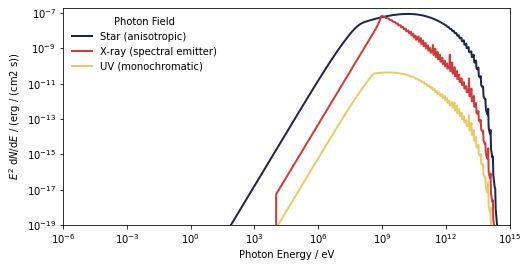

In [23]:
plt.figure(figsize=(8,4))

IC = InverseCompton(ECPL, 
                    index = 1.8,
                    seed_photon_fields=[
                        # star located at 120 deg with respect to line-of-sight
                        ['STAR', 25000 * u.K, 3000 * u.eV / u.cm**3, 120 * u.deg],
                        # Emitter with spectral index 2 between 1 and 10 keV
                        ['X-ray', [1, 10] * u.keV, [1, 1e-2] * 1 / (u.eV * u.cm**3)],
                        # Monochromatic photon field at 50 eV
                        ['UV', 50 * u.eV, 15 * u.eV / u.cm**3]
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='STAR'), label='Star (anisotropic)')
plt.plot(Egs, IC.sed(Egs, seed='X-ray'), label='X-ray (spectral emitter)')
plt.plot(Egs, IC.sed(Egs, seed='UV'), label='UV (monochromatic)')

plt.legend(title='Photon Field')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-19, 2e-7);

plt.savefig('naima-InverseCompton-PhotonFields2.pdf')

In [24]:
IC.seed_photon_fields

OrderedDict([('STAR',
              {'isotropic': False,
               'theta': <Quantity 120. deg>,
               'type': 'thermal',
               'T': <Quantity 25000. K>,
               'u': <Quantity 3000. eV / cm3>}),
             ('X-ray',
              {'isotropic': True,
               'type': 'array',
               'energy': <Quantity [ 1., 10.] keV>,
               'photon_density': <Quantity [1.  , 0.01] 1 / (cm3 eV)>}),
             ('UV',
              {'isotropic': True,
               'type': 'array',
               'energy': <Quantity [50.] eV>,
               'photon_density': <Quantity [15.] eV / cm3>})])

### Synchrotron

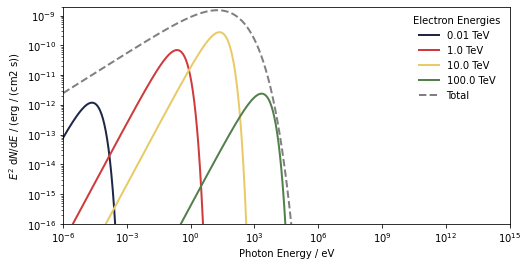

In [25]:
plt.figure(figsize=(8,4))

for i, Ee in enumerate([0.01, 1, 10, 100]*u.TeV):
    SYN = Synchrotron(ECPL, 
                      B=3*u.uG,
                      Eemin=0.9*Ee,
                      Eemax=1.1*Ee
                      )
    plt.plot(Egs, SYN.sed(Egs), label=f'{np.round(Ee, 2)}' )

SYN = Synchrotron(ECPL, 
                  B=3*u.uG,
                  Eemin=1*u.GeV
                 )
plt.plot(Egs, SYN.sed(Egs), label='Total', color='gray', ls='dashed')

plt.legend(title='Electron Energies')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({SYN.sed(1*u.TeV).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-16, 2e-9);

plt.savefig('naima-Synchrotron-Edep.pdf');

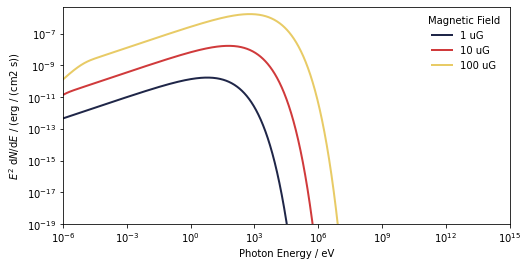

In [26]:
plt.figure(figsize=(8,4))

SYN = Synchrotron(ECPL, B=1*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='1 uG')

SYN = Synchrotron(ECPL, B=10*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='10 uG')

SYN = Synchrotron(ECPL, B=100*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='100 uG')

plt.legend(title='Magnetic Field')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({SYN.sed(Egs).unit})')

plt.xlim(1e-6, 1e15)
plt.ylim(1e-19, 5e-6);

plt.savefig('naima-Synchrotron-B.pdf');

### Synchrotron Self Compton

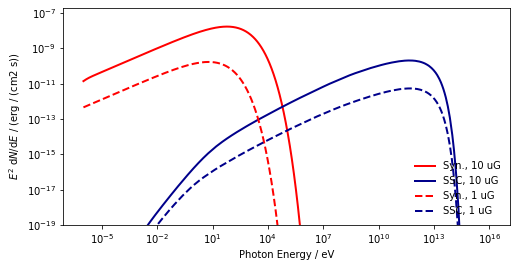

In [27]:
plt.figure(figsize=(8,4))

SYN = Synchrotron(ECPL, B=10*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='Syn., 10 uG', color='red')

# Define energy array for synchrotron seed photon field and compute
# Synchroton luminosity by setting distance to 0. The energy range should
# capture most of the synchrotron output.
Esy = np.logspace(-10, 6, 200) * u.eV
Lsy = SYN.flux(Esy, distance = 0 * u.cm)

# Define source radius and compute photon density
# Note the factor 2.24 in the computation of the synchrotron photon density, 
# which comes from geometrical considerations of a uniform spherical emitter 
# (see Section 4.1 of Atoyan & Aharonian 1996). 
R = 2 * u.pc
phn_sy = Lsy / (4 * np.pi * R ** 2 * c) * 2.24

# Create IC instance with synchrotron seed photon fields:
SSC = InverseCompton(ECPL, 
                    seed_photon_fields=[['SSC', Esy, phn_sy]]
)
plt.plot(Egs, SSC.sed(Egs), label='SSC, 10 uG', color='darkblue')

SYN = Synchrotron(ECPL, B=1*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='Syn., 1 uG', color='red', ls='dashed')

Lsy = SYN.flux(Esy, distance = 0 * u.cm)
phn_sy = Lsy / (4 * np.pi * R ** 2 * c) * 2.24
SSC = InverseCompton(ECPL, 
                    seed_photon_fields=[['SSC', Esy, phn_sy]]
)
plt.plot(Egs, SSC.sed(Egs), label='SSC, 1 uG', color='darkblue', ls='dashed')

plt.legend(title='')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({SSC.sed(Egs).unit})')

#plt.xlim(1e-6, 1e15)
plt.ylim(1e-19, 2e-7);

plt.savefig('naima-SSC-B.pdf');

## EBL Absorption

In [28]:
from naima.models import EblAbsorptionModel

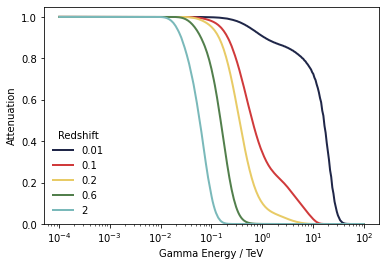

In [29]:
mask = (Egs > 0.1 * u.GeV) & (Egs < 100 * u.TeV)

EBL = EblAbsorptionModel(0.01)
plt.plot(Egs[mask].to(u.TeV), EBL.transmission(Egs[mask]), label='0.01')

EBL = EblAbsorptionModel(0.1)
plt.plot(Egs[mask].to(u.TeV), EBL.transmission(Egs[mask]), label='0.1')

EBL = EblAbsorptionModel(0.2)
plt.plot(Egs[mask].to(u.TeV), EBL.transmission(Egs[mask]), label='0.2')

EBL = EblAbsorptionModel(0.6)
plt.plot(Egs[mask].to(u.TeV), EBL.transmission(Egs[mask]), label='0.6')

EBL = EblAbsorptionModel(2)
plt.plot(Egs[mask].to(u.TeV), EBL.transmission(Egs[mask]), label='2')

plt.legend(title='Redshift')

plt.xscale('log')
#plt.yscale('log')

plt.xlabel(f'Gamma Energy / TeV')
plt.ylabel(f'Attenuation')

plt.ylim(0,1.05);

plt.savefig('naima-EBL.pdf');

### Putting everything together...

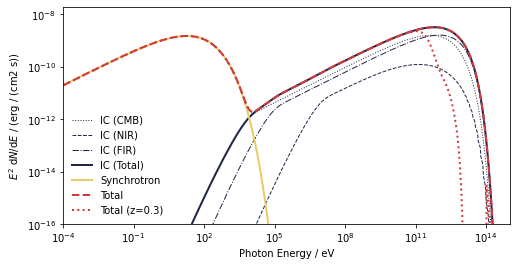

In [30]:
plt.figure(figsize=(8,4))

IC = InverseCompton(ECPL, 
                    index = 1.8,
                    seed_photon_fields=[
                        ['CMB', 2.72548*u.K, 4.17467838e-13*u.erg/u.cm**3],
                        ['NIR', 3000*u.K, 1*u.eV/u.cm**3],
                        ['FIR', 30*u.K, 0.5*u.eV/u.cm**3],\
                    ],
                   )
plt.plot(Egs, IC.sed(Egs, seed='CMB'), label='IC (CMB)', color='#1F2648', lw=1, ls='dotted')
plt.plot(Egs, IC.sed(Egs, seed='NIR'), label='IC (NIR)', color='#1F2648', lw=1, ls='dashed')
plt.plot(Egs, IC.sed(Egs, seed='FIR'), label='IC (FIR)', color='#1F2648', lw=1, ls='dashdot')
plt.plot(Egs, IC.sed(Egs), label='IC (Total)')


SYN = Synchrotron(ECPL, B=3*u.uG)
plt.plot(Egs, SYN.sed(Egs), label='Synchrotron', color='#E8CB66')

plt.plot(Egs, SYN.sed(Egs) + IC.sed(Egs), label='Total', ls='dashed', color='#D03A3B')

EBL = EblAbsorptionModel(0.3)
plt.plot(Egs, (SYN.sed(Egs) + IC.sed(Egs)) * EBL.transmission(Egs), label='Total (z=0.3)', ls='dotted', color='#D03A3B')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xlabel(f'Photon Energy / {Egs.unit}')
plt.ylabel(f'$E^2$ d$N$/d$E$ / ({IC.sed(Egs).unit})')

plt.xlim(1e-4, 1e15)
plt.ylim(1e-16, 2e-8);

plt.savefig('naima-SED.pdf');